## Importing the data and the required libraries

In [1]:
#Importing all the libraries and modules
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [9]:
weather_df=pd.read_csv('../Final Datasets/Temperature.csv')

In [10]:
print(weather_df.shape)
print(weather_df.describe())
print(weather_df.head())
print(weather_df.columns)
weather_df.drop(["Time"],axis=1,inplace=True)

(100990, 9)
                Date          Month           Hour     heatindex  \
count  100990.000000  100990.000000  100990.000000  29155.000000   
mean       15.690049       6.579344      10.928844     35.651710   
std         8.769718       3.475841       6.854328      5.015384   
min         1.000000       1.000000       0.000000     26.800000   
25%         8.000000       4.000000       5.000000     31.700000   
50%        16.000000       7.000000      11.000000     35.100000   
75%        23.000000      10.000000      17.000000     39.200000   
max        31.000000      12.000000      23.000000     73.600000   

            humidity           rain           temp  temp previous  
count  100233.000000  100990.000000  100317.000000  100317.000000  
mean       57.909481       0.026260      25.451269      25.450911  
std        23.807771       0.159908       8.482859       8.482633  
min         4.000000       0.000000       1.000000       1.000000  
25%        39.000000       0.000000

# Preprocessing the data

In [11]:
print(weather_df.isnull().any())

Date             False
Month            False
Hour             False
heatindex         True
humidity          True
rain             False
temp              True
temp previous     True
dtype: bool


### Temperature

In [12]:
# Temperature Previous

def replace(j):
    if weather_df["temp previous"][j]!=(-10):
        return weather_df["temp previous"][j]
    else:
        return replace(j+1)
        
weather_df["temp previous"].fillna(-10, inplace = True)

for i in range(100990):
    if weather_df["temp previous"][i]==-10:
        weather_df["temp previous"][i]=(replace(i+1)+weather_df["temp previous"][i-1])/2
    elif weather_df["temp previous"][i]>=50:
        weather_df["temp previous"][i]=(weather_df["temp previous"][i-1]+weather_df["temp previous"][i+1])/2
        

In [13]:
print(weather_df["temp previous"].isnull().any())
weather_df["temp previous"][124]

False


17.0

In [14]:
# Temperature

print(weather_df["temp"].isnull().any())

weather_df["temp"].fillna(-300, inplace = True)

for i in range(100990):
    if weather_df["temp"][i]==-300:
        weather_df["temp"][i]=weather_df["temp previous"][i+1]
    elif weather_df["temp"][i]>100:
        weather_df["temp"][i]=weather_df["temp previous"][i+1]


True


In [15]:
print(weather_df["temp"].isnull().any())
weather_df["temp"][123]

False


15.0

### Humidity

In [16]:
weather_df["humidity"].fillna(-100, inplace = True)

print(weather_df["humidity"].isnull().any())

def replace(j):
    if weather_df["humidity"][j]!=(-100):
        return weather_df["humidity"][j]
    else:
        return replace(j+1)

for i in range(100990):
    if weather_df["humidity"][i]==-100:
        weather_df["humidity"][i]=(replace(i+1)+weather_df["humidity"][i-1])/2
    elif weather_df["humidity"][i]>100:
        weather_df["humidity"][i]=(weather_df["humidity"][i-1]+weather_df["humidity"][i+1])/2
        

False


In [17]:
weather_df["humidity"][124]

59.0

### Heat Index

In [18]:
#This is the function for calculating heat index
def HI(t,H):
    c1 = -42.379
    c2= 2.04901523
    c3 = 10.14333127
    c4 = -0.22475541
    c5 = -6.83783 *(0.001)
    c6 = -5.481717 * (0.01)
    c7 = 1.22874 * (0.001)
    c8 = 8.5282 * (0.0001)
    c9 = -1.99 * (0.000001)
    T=(1.8*t)+32
    HI=c1+(c2*T)+(c3*H)+(c4*T*H)+(c5*T*T)+(c6*H*H)+(c7*T*H*T)+(c8*T*H*H)+(c9*T*H*T*H)
    FHI=((HI-32)*5)/9
    return FHI

weather_df["heatindex"].fillna(-200, inplace = True)


for i in range(100990):
    if weather_df["heatindex"][i]==-200:
        weather_df["heatindex"][i]=HI(weather_df["temp previous"][i],weather_df["humidity"][i])
    elif weather_df["heatindex"][i]>60:
        weather_df["heatindex"][i]=HI(weather_df["temp previous"][i],weather_df["humidity"][i])
        
    

In [19]:
print(weather_df["heatindex"][124])

26.336388312444445


In [20]:
weather_df_num=weather_df[list(weather_df.dtypes[weather_df.dtypes!='object'].index)]
weather_y=weather_df_num.pop('temp')
weather_x=weather_df_num

In [21]:
train_x,test_x,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.2,random_state=4)
train_x.head()

,Date,Month,Hour,heatindex,humidity,rain,temp previous
99686,6,1,15,23.022729,96.0,0,24.0
18305,29,1,10,26.052968,35.0,0,17.0
91877,20,8,6,36.195542,57.0,0,32.0
55714,29,2,14,29.310097,47.0,0,29.0
40664,2,2,7,24.059801,82.0,0,14.0


## Traning ML Models

### Linear Regression

In [22]:
#Linear Regression
tlrmodel = LinearRegression()
tlrmodel.fit(train_x,train_y)

LinearRegression()

In [23]:
print(test_x)
prediction=tlrmodel.predict(test_x)
#Calculating error
np.mean((prediction-test_y)**2)

       Date  Month  Hour  heatindex  humidity  rain  temp previous
16733    18     11     8  23.560415      21.0     0           21.0
82934    21      4    15  26.307993      27.0     0           27.0
33831    11      4    13  34.400386      13.0     0           37.0
22660    14     12    19  21.838011      77.0     0           20.0
47063    16      8    14  33.600000      89.0     0           33.0
...     ...    ...   ...        ...       ...   ...            ...
26343    24      5     8  44.400000      21.0     0           36.0
10264    12      9    22  25.540468      94.0     0           25.0
17753     4      1    15  19.325880      88.0     0           16.0
98956     2     12    12  25.961348      73.0     0           25.0
46164    26      7    23  34.500000      79.0     0           28.0

[20198 rows x 7 columns]


17.912631961345774

In [24]:
l=[6,7,18,43,65,1,33]
x=np.array(l).reshape(1,-1)
print(x.shape)
prediction=tlrmodel.predict(test_x)
print(prediction,tlrmodel.predict(x))

(1, 7)
[28.18760389 29.88467022 38.69870806 ... 13.11273561 22.92977049
 23.70496936] [31.86612191]


In [25]:
pd.DataFrame({'actual':test_y,'prediction':prediction,'diff':(test_y-prediction)})

,actual,prediction,diff
16733,28.0,28.187604,-0.187604
82934,30.0,29.884670,0.115330
33831,35.0,38.698708,-3.698708
22660,14.0,18.767048,-4.767048
47063,28.0,25.488163,2.511837
...,...,...,...
26343,43.0,38.364827,4.635173
10264,25.0,19.014127,5.985873
17753,11.0,13.112736,-2.112736
98956,22.0,22.929770,-0.929770


In [23]:
import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(tlrmodel, '../Trained Models/TLinearRegression.pkl') 
  
# Load the model from the file only to be uncommented when to be used 
#LR = joblib.load('../Trained Models/TLinearRegression.pkl')  
  
# Use the loaded model to make predictions 
#LR.predict(X_test)

C:\Users\Mayank\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['nTLinearRegression.pkl']

In [26]:
test_x

,Date,Month,Hour,heatindex,humidity,rain,temp previous
16733,18,11,8,23.560415,21.0,0,21.0
82934,21,4,15,26.307993,27.0,0,27.0
33831,11,4,13,34.400386,13.0,0,37.0
22660,14,12,19,21.838011,77.0,0,20.0
47063,16,8,14,33.600000,89.0,0,33.0
...,...,...,...,...,...,...,...
26343,24,5,8,44.400000,21.0,0,36.0
10264,12,9,22,25.540468,94.0,0,25.0
17753,4,1,15,19.325880,88.0,0,16.0
98956,2,12,12,25.961348,73.0,0,25.0


### Polynomial Regression

In [28]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=4, include_bias=False)

In [29]:
x_poly=poly.fit_transform(train_x)
lin2=LinearRegression()
lin2.fit(x_poly,train_y)

LinearRegression()

In [30]:
prediction2 = lin2.predict(poly.fit_transform(test_x))
#Calculating the error
np.mean((prediction2-test_y)**2)

3.879561757397738

In [31]:
pd.DataFrame({'actual':test_y,'prediction':prediction2,'diff':(test_y-prediction2)})

,actual,prediction,diff
16733,28.0,28.649311,-0.649311
82934,30.0,30.980069,-0.980069
33831,35.0,37.307334,-2.307334
22660,14.0,13.337280,0.662720
47063,28.0,28.663852,-0.663852
...,...,...,...
26343,43.0,42.531865,0.468135
10264,25.0,24.870430,0.129570
17753,11.0,12.823711,-1.823711
98956,22.0,18.820612,3.179388


In [32]:
#Saving the Polynomial Regression Model
import joblib 
joblib.dump(lin2, '../Trained Models/TPolynomialRegression.pkl') 
  
# Load the model from the file only to be uncommented when to be used 
#PR = joblib.load('PRTP.pkl')  
  
# Use the loaded model to make predictions 
#PR.predict(X_test)

['nTPolynomialRegression.pkl']

### Decision Trees

In [33]:
#Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(train_x,train_y)

DecisionTreeRegressor(random_state=0)

In [34]:
prediction3=regressor.predict(test_x)
print(np.mean((prediction3-test_y)**2))
dt=np.array([6,7,18,43,65,1,33]).reshape(1,-1)
print(regressor.predict(dt))

4.804508972285484
[34.]


In [35]:
pd.DataFrame({'actual':test_y,'prediction':prediction3,'diff':(test_y-prediction3)})

,actual,prediction,diff
16733,28.0,28.0,0.0
82934,30.0,31.0,-1.0
33831,35.0,38.0,-3.0
22660,14.0,17.0,-3.0
47063,28.0,28.0,0.0
...,...,...,...
26343,43.0,43.0,0.0
10264,25.0,24.5,0.5
17753,11.0,12.0,-1.0
98956,22.0,22.0,0.0


In [36]:
#Saving the Decision Tree
joblib.dump(regressor, '../Trained Models/TDecisionTree.pkl') 

# Load the model from the file only to be uncommented when to be used 
#DT = joblib.load('TDecision.pkl')  
  
# Use the loaded model to make predictions 
#DT.predict(X_test)

['nTDecisionTree.pkl']

### Random Forest

In [37]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=60,random_state=0,n_estimators=100)
regr.fit(train_x,train_y)

RandomForestRegressor(max_depth=60, random_state=0)

In [38]:
prediction4=regr.predict(test_x)
np.mean((prediction4-test_y)**2)

2.551942819227672

In [39]:
regr.predict(dt)

array([32.95])

In [40]:
pd.DataFrame({'actual':test_y,'prediction':prediction4,'diff':(test_y-prediction4)})

,actual,prediction,diff
16733,28.0,29.280000,-1.280000
82934,30.0,31.560000,-1.560000
33831,35.0,35.900000,-0.900000
22660,14.0,16.030000,-2.030000
47063,28.0,28.000000,0.000000
...,...,...,...
26343,43.0,43.010000,-0.010000
10264,25.0,24.603333,0.396667
17753,11.0,12.450000,-1.450000
98956,22.0,19.660000,2.340000


In [42]:
import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(regr, '../Trained Models/TRandomForest.pkl') 
  
# Load the model from the file only to be uncommented when to be used 
#RF = joblib.load('TRandomForest.pkl')  
  
# Use the loaded model to make predictions 
#TEMP.predict(X_test)

['nTRandomForest.pkl']

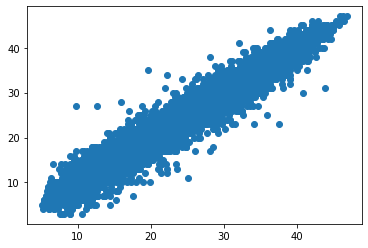

In [43]:
plt.scatter(prediction4,test_y)

## Iterating through individual predictions

In [44]:
from datetime import datetime
datetime.today()
date=datetime.now()

In [45]:
D=date.day
H=date.hour
M=date.month
print(D,H,M)

20 15 3


In [48]:
#For hourly, daily, weekly and min max temp details
L=[]
import random
D=date.day
H=date.hour
M=date.month
tp=33
for d in range(1,15):
    for h in range(1,25):
        para=np.array([D,M,H,48,45,0,tp]).reshape(1,-1)
        p=tlrmodel.predict(para)
        #print(p,H,D,M)
        tp=list(p)[0]
        H+=1
        if H==24:
            H=0
            h=24
            D+=1
        if D==31:
            M+=1
            D=1
        
